#### Import Librarie and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Data
df = pd.read_csv('/content/drive/MyDrive/Portofolio/Titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check the missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
# Fill missing values in the 'Age' column with the median value
df['Age'] = df['Age'].fillna(df['Age'].median())

In [7]:
# Fill missing values in the 'Embarked' column with the modus value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [8]:
new_df=df.copy()

In [9]:
# Remove the 'Cabin' column from the DataFrame
df.drop(['Cabin'], axis=1, inplace=True)

In [10]:
# Check duplicate value
df.duplicated().sum()

0

In [11]:
# Check the missing value
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#### Exploratory Data Analysis

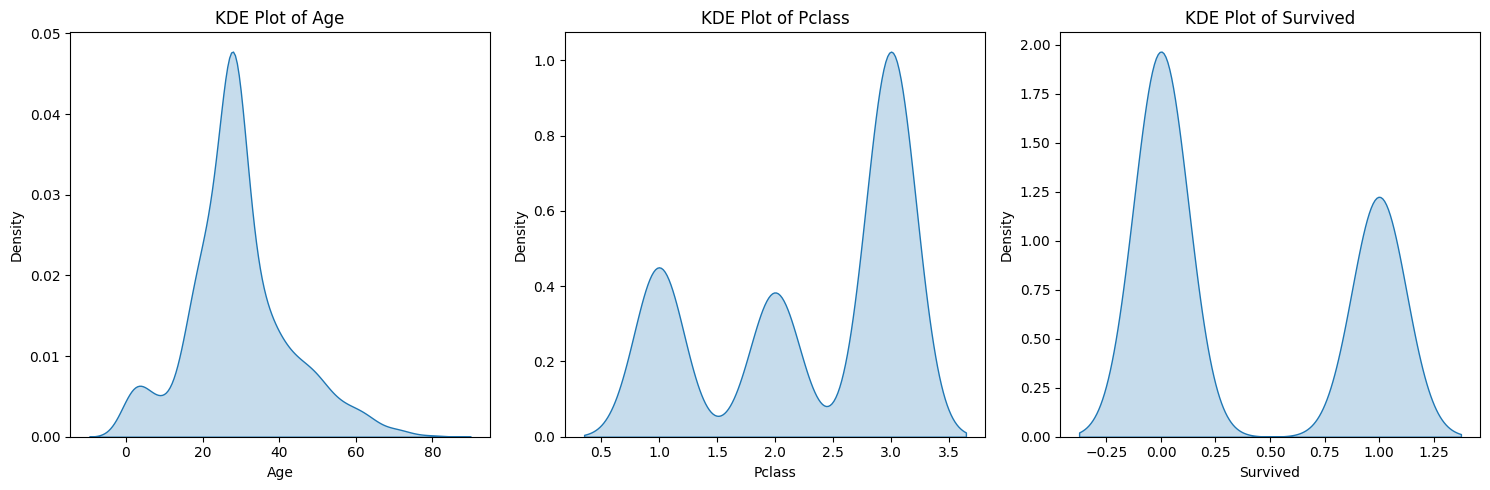

In [12]:
# Set up the matplotlib figure with 3 subplots
plt.figure(figsize=(15, 5))

# KDE Plot for 'Age'
plt.subplot(1, 3, 1)  # 1 row, 3 columns, subplot 1
sns.kdeplot(data=df, x='Age', fill=True)
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

# KDE Plot for 'Pclass'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, subplot 2
sns.kdeplot(data=df, x='Pclass', fill=True)
plt.title('KDE Plot of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Density')

# KDE Plot for 'Survived'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, subplot 3
sns.kdeplot(data=df, x='Survived', fill=True)
plt.title('KDE Plot of Survived')
plt.xlabel('Survived')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

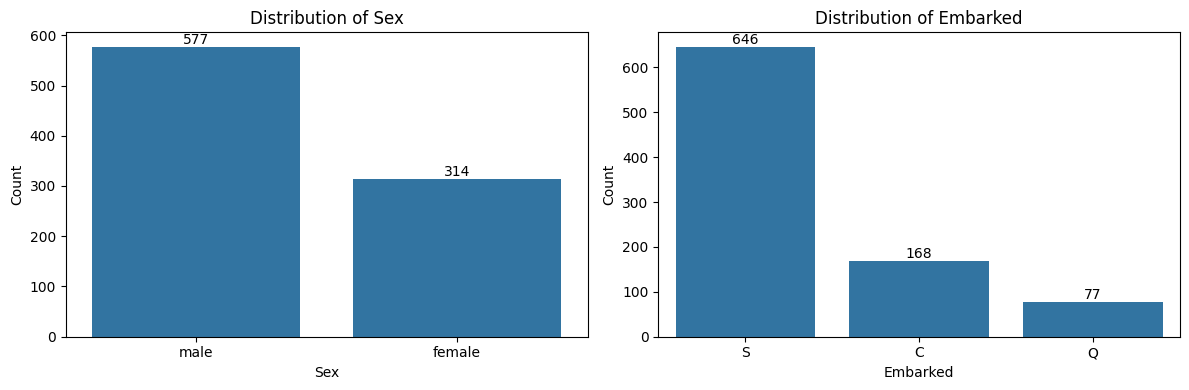

In [13]:
# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Get a list of categorical columns (excluding 'Name' and 'Ticket')
categorical = [col for col in df.select_dtypes(include=['object']).columns if col!='Name' and col!='Ticket']

# Loop through each categorical column
for ax, col in zip(axes.flat, categorical):
    sns.countplot(x=col, data=df, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64
 


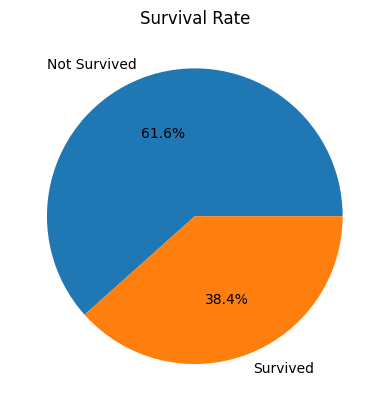

In [14]:
# Print the count of each unique value in the 'Churn' column
print(df.Survived.value_counts())
print(" ")

# Calculate the percentage of each class in the 'Churn' column
labels = ['Not Survived', 'Survived']
sizes = df['Survived'].value_counts()

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Survival Rate')
plt.show()

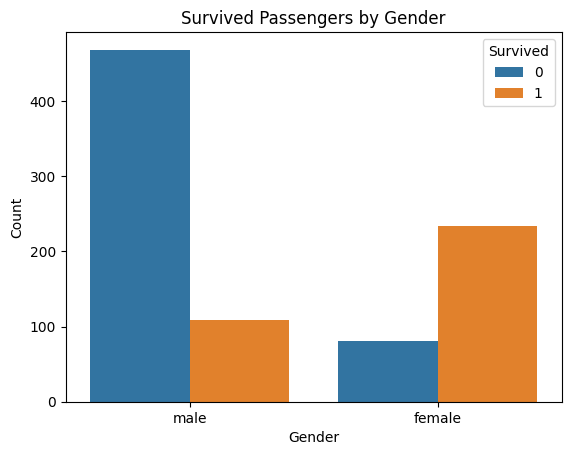

In [15]:
# Display the distribution of survived passengers by gender
sns.countplot(df, x="Sex", hue="Survived")
plt.title('Survived Passengers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

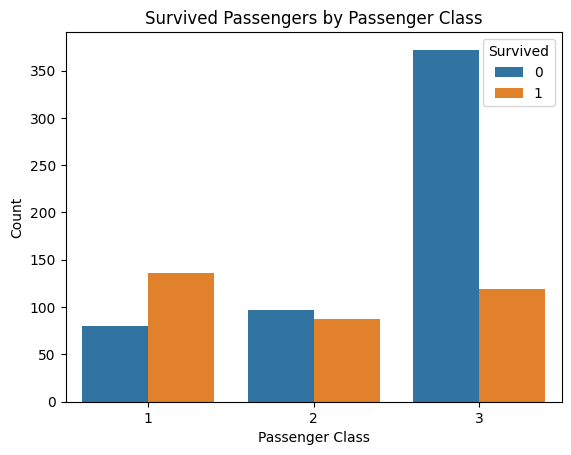

In [16]:
# Display the distribution of survived passengers by passenger class
sns.countplot(df, x="Pclass", hue="Survived")
plt.title('Survived Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

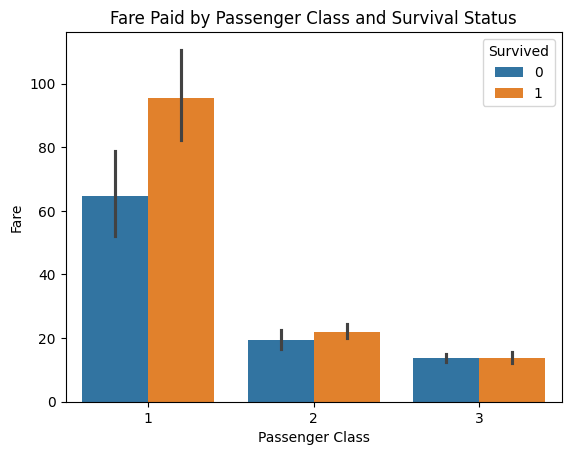

In [17]:
# Display the fare paid by passenger class and survived
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare Paid by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.show()

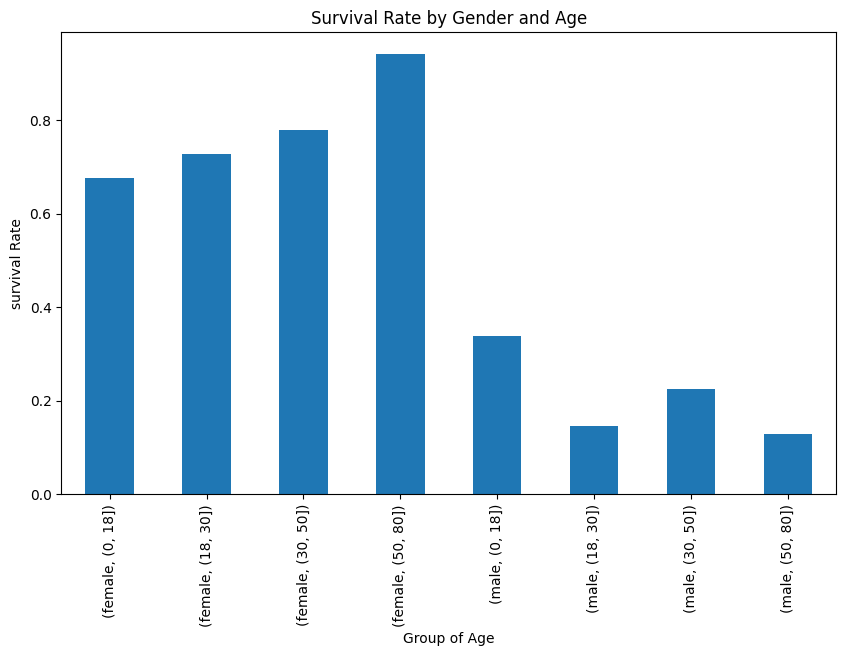

In [18]:
survival_age = df.groupby(['Sex', pd.cut(df['Age'], bins=[0, 18, 30, 50, 80])], observed=True)['Survived'].mean()
ax = survival_age.plot(kind='bar', figsize=(10, 6))
ax.set_title("Survival Rate by Gender and Age")
ax.set_xlabel("Group of Age")
ax.set_ylabel("survival Rate")
plt.show()

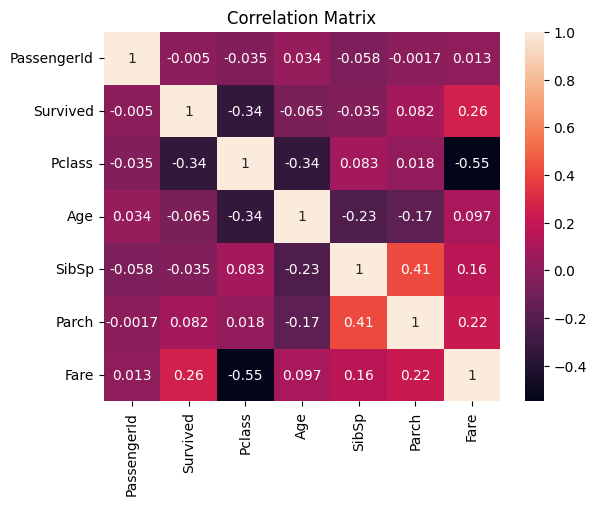

In [19]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### Feature Engineering

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
# Label encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


##### Feature Selection

In [23]:
# Separate the features from the target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
x = df[features]
y = df['Survived']

In [24]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [25]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [26]:
from sklearn.model_selection import train_test_split

# Divide the data into training group and test group
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train, y_train

(     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
 331       1    1  45.5      0      0   28.5000         2
 733       2    1  23.0      0      0   13.0000         2
 382       3    1  32.0      0      0    7.9250         2
 704       3    1  26.0      1      0    7.8542         2
 813       3    0   6.0      4      2   31.2750         2
 ..      ...  ...   ...    ...    ...       ...       ...
 106       3    0  21.0      0      0    7.6500         2
 270       1    1  28.0      0      0   31.0000         2
 860       3    1  41.0      2      0   14.1083         2
 435       1    0  14.0      1      2  120.0000         2
 102       1    1  21.0      0      1   77.2875         2
 
 [712 rows x 7 columns],
 331    0
 733    0
 382    0
 704    0
 813    0
       ..
 106    1
 270    0
 860    0
 435    1
 102    0
 Name: Survived, Length: 712, dtype: int64)

In [28]:
x_test, y_test

(     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 709       3    1  28.0      1      1  15.2458         0
 439       2    1  31.0      0      0  10.5000         2
 840       3    1  20.0      0      0   7.9250         2
 720       2    0   6.0      0      1  33.0000         2
 39        3    0  14.0      1      0  11.2417         0
 ..      ...  ...   ...    ...    ...      ...       ...
 433       3    1  17.0      0      0   7.1250         2
 773       3    1  28.0      0      0   7.2250         0
 25        3    0  38.0      1      5  31.3875         2
 84        2    0  17.0      0      0  10.5000         2
 10        3    0   4.0      1      1  16.7000         2
 
 [179 rows x 7 columns],
 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 433    0
 773    0
 25     1
 84     1
 10     1
 Name: Survived, Length: 179, dtype: int64)

#### Model Prediction & Evaluation

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

##### RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred_rf = rf.predict(x_test)

# Calculate evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')

Accuracy: 0.82
Precision: 0.81
Recall: 0.74
F1 Score: 0.77


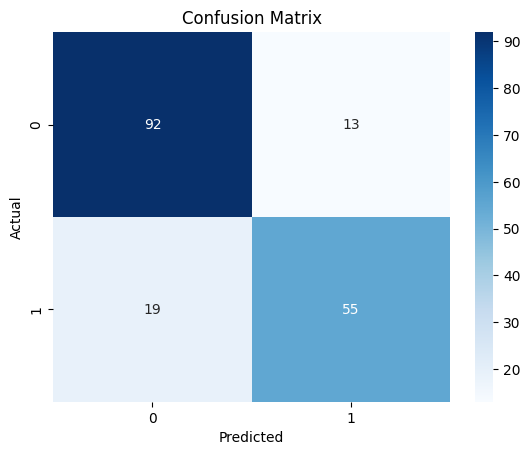

In [32]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



##### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

# Define the model
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [35]:
y_pred_lr = lr.predict(x_test)

# Calculate evaluation metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Precision: {lr_precision:.2f}')
print(f'Recall: {lr_recall:.2f}')
print(f'F1 Score: {lr_f1:.2f}')

Accuracy: 0.78
Precision: 0.76
Recall: 0.69
F1 Score: 0.72


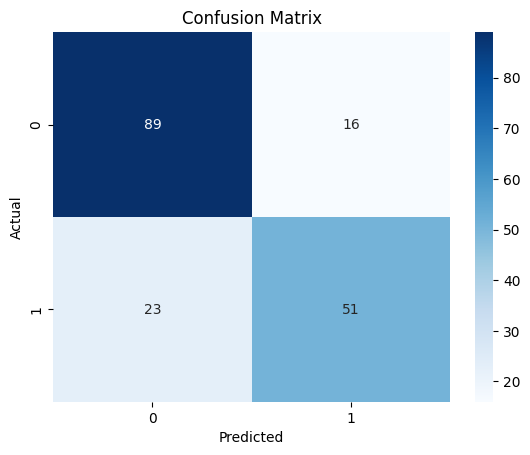

In [36]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



##### DecisionTreeClassifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [39]:
y_pred_dt = dt.predict(x_test)

# Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
print(f'Accuracy: {dt_accuracy:.2f}')
print(f'Precision: {dt_precision:.2f}')
print(f'Recall: {dt_recall:.2f}')
print(f'F1 Score: {dt_f1:.2f}')

Accuracy: 0.78
Precision: 0.72
Recall: 0.77
F1 Score: 0.75


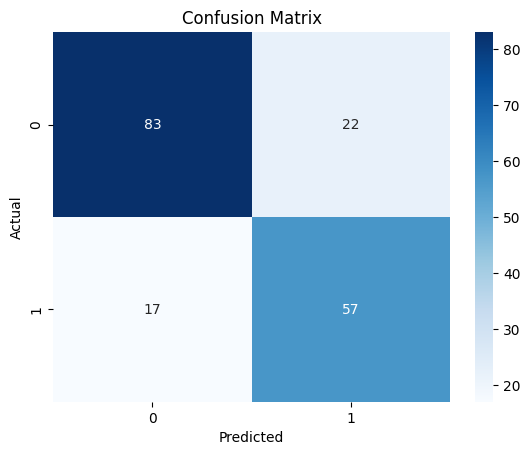

In [40]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



##### XGBClassifier

In [42]:
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
y_pred_xgb = xgb.predict(x_test)

# Calculate evaluation metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
print(f'Accuracy: {xgb_accuracy:.2f}')
print(f'Precision: {xgb_precision:.2f}')
print(f'Recall: {xgb_recall:.2f}')
print(f'F1 Score: {xgb_f1:.2f}')

Accuracy: 0.79
Precision: 0.74
Recall: 0.76
F1 Score: 0.75


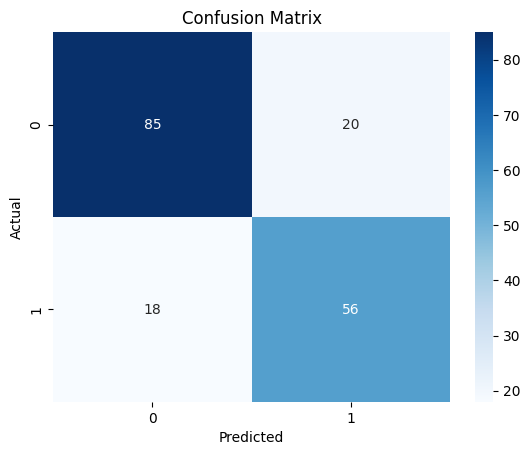

In [44]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



##### KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

# Define the model
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_kn = kn.predict(x_test)

# Calculate evaluation metrics
kn_accuracy = accuracy_score(y_test, y_pred_kn)
kn_precision = precision_score(y_test, y_pred_kn)
kn_recall = recall_score(y_test, y_pred_kn)
kn_f1 = f1_score(y_test, y_pred_kn)
print(f'Accuracy: {kn_accuracy:.2f}')
print(f'Precision: {kn_precision:.2f}')
print(f'Recall: {kn_recall:.2f}')
print(f'F1 Score: {kn_f1:.2f}')

Accuracy: 0.70
Precision: 0.68
Recall: 0.53
F1 Score: 0.60


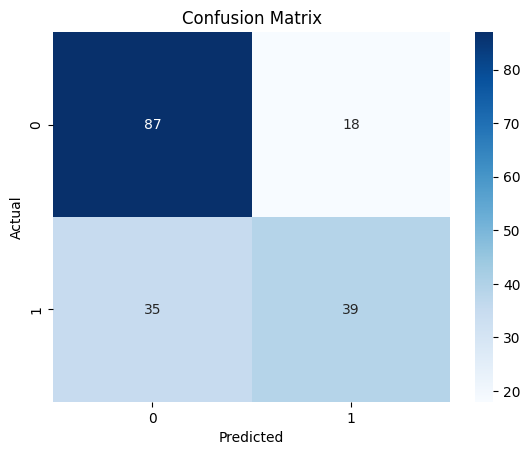

In [48]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_kn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [49]:
print(classification_report(y_test, y_pred_kn))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       105
           1       0.68      0.53      0.60        74

    accuracy                           0.70       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.70      0.70      0.70       179



In [50]:
# Define the models
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(solver='liblinear', random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier()
]

In [51]:
res = []
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    res.append({
        "Model": model.__class__.__name__,
        "Accuracy": f"{accuracy:.2f}"
    })

# Create a Pandas DataFrame from the results
table = pd.DataFrame(res)
table

,Model,Accuracy
0,RandomForestClassifier,0.82
1,LogisticRegression,0.78
2,DecisionTreeClassifier,0.78
3,XGBClassifier,0.79
4,KNeighborsClassifier,0.70


from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Accuracy'].value_counts()
    for x_label, grp in table.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Accuracy')

In [70]:
feature_importance = rf.feature_importances_

feature_names = x_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


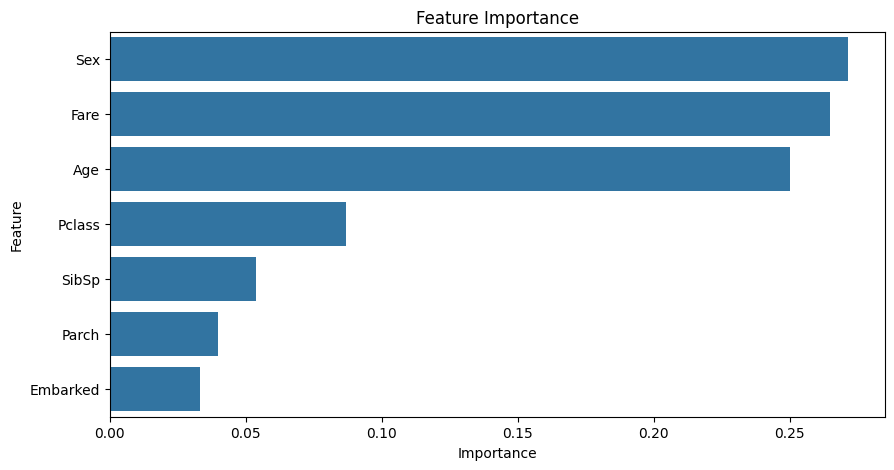

In [71]:
# Plotting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=df_feature_importance)
plt.title('Feature Importance')
plt.show()